Saving 5. Classify Customer Churn.csv to 5. Classify Customer Churn (11).csv


<ipython-input-14-909e19cbc4ab>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


📊 Evaluation Metrics:
Accuracy : 0.7935
Precision: 0.6388
Recall   : 0.5107

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



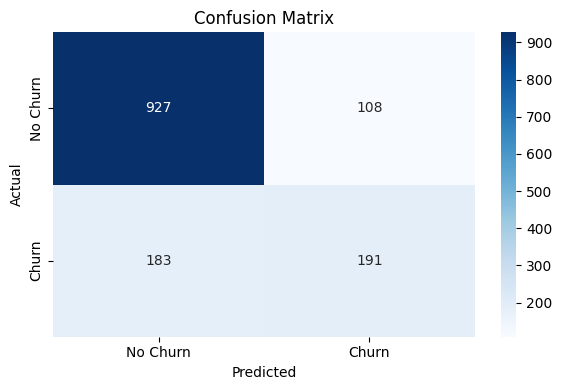

In [14]:
# Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()

# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# Step 3: Load the dataset
df = pd.read_csv("5. Classify Customer Churn.csv")

# Step 4: Data preprocessing

# Drop customerID as it is not a useful feature
df.drop("customerID", axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (handle missing or bad values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove("Churn")  # We'll encode target separately

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode the target column
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Normalize the features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("📊 Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}\n")

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
